# Time and Dates in Python

Time and date data are not precisely the same as integers, strings and floats. Here we will introduce a couple of ways that python handles time and date data.

## What we will accomplish

In this notebook we will introduce:
- The `datetime` module,
- `timedelta`s,
- Datetimes in `numpy` and
- Timestamps in `pandas`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style

set_style("whitegrid")

## `datetime`s and `timedelta`s

Python's built-in module for handling time and date data is the `datetime` module.

In [2]:
## DOCS: https://docs.python.org/3/library/datetime.html
from datetime import datetime, timedelta

This module allows you to make `date` objects which only include the date, `datetime` objects which include the date and time and `timedelta`s which encode a temporal difference between two `dates` or `datetime`s. 

We will focus on `datetime`s and `timedelta`s and you can learn more about `date`s on your own time using the documentation link provided above.

### Making `datetime`s

There are a few different ways you can make a `datetime` from scratch, we will cover the most basic.

In [3]:
## to make a datetime object call 
## datetime.datetime(year, month, day, hour, minute, second, microsecond)
datetime(2022, 4, 11)

datetime.datetime(2022, 4, 11, 0, 0)

In [4]:
## let's store a datetime
## write in the datetime for your birthday
D = datetime(2022, 4, 11)

In [5]:
## We can access the year
D.year

2022

In [6]:
## We can access the month
D.month

4

In [7]:
## We can access the day
D.day

11

In [8]:
## We can access the hour
D.hour

0

In [9]:
## We can access the minute
D.minute

0

In [10]:
## We can access the second
D.second

0

In [11]:
## There are even special datetimes like .now()
datetime.now()

datetime.datetime(2024, 5, 14, 9, 47, 50, 914313)

#### `timedelta`

A `timedelta` allows you to move forward or backward from a given datetime.

In [12]:
print("Current datetime", D)
print("Moving back two days", D - timedelta(days=2))

Current datetime 2022-04-11 00:00:00
Moving back two days 2022-04-09 00:00:00


Note that you cannot do this for any time unit, only:
- `weeks`,
- `days`,
- `hours`,
- `minutes`,
- `seconds`,
- `microseconds` and
- `milliseconds`.

## Dates and times in `numpy`

`numpy` has its own built-in `datetime64` and `timedelta64` objects that you may have to use depending upon the project.

In `numpy` `datetime64`s should be created with strings, as we will demonstrate.

In [13]:
## strings can go "year-month-day"
np.datetime64("2022-04-11")

numpy.datetime64('2022-04-11')

`datetime64` is not as nice as `datetime` because we are unable to access the day, month, year, etc.

However, `timedelta64`s work in roughly the same way as `timedelta`.

In [14]:
## you put in two arguments
## first the number of whatever time unit you are adding/subtracting
## then the time unit
## here we add 12 days
np.datetime64("2022-03-24") + np.timedelta64(12, 'D')

numpy.datetime64('2022-04-05')

D)ay, (M)onth, (Y)ear, (h)ours, (m)inutes, or (s)e

Time units you can use include:
- `'D'` for days,
- `'W'` for weeks,
- `'M'` for months,
- `'Y'` for years,
- `'h'` for hours,
- `'m'` for minutes and
- `'s'` for seconds.


An added nice feature is that `datetime64`s play well with `np.arange`.

In [15]:
## put the start date first
## then the end date
## then the unit you would like to increment by in datetime64, all as strings
np.arange('2022-03-24', '2022-04-17', dtype='datetime64[D]')

array(['2022-03-24', '2022-03-25', '2022-03-26', '2022-03-27',
       '2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31',
       '2022-04-01', '2022-04-02', '2022-04-03', '2022-04-04',
       '2022-04-05', '2022-04-06', '2022-04-07', '2022-04-08',
       '2022-04-09', '2022-04-10', '2022-04-11', '2022-04-12',
       '2022-04-13', '2022-04-14', '2022-04-15', '2022-04-16'],
      dtype='datetime64[D]')

To learn more about `numpy` `datetime64`s and `timedelta64`s check out the `numpy` documentation page, <a href="https://numpy.org/doc/stable/reference/arrays.datetime.html">https://numpy.org/doc/stable/reference/arrays.datetime.html</a>.

## `pandas` `Timestamp`s

We will end with a brief introduction to `pandas` `Timestamp` object. Since we use `pandas` for a lot of our data handling, we will likely encounter such objects.

Creating a `Timestamp` is closer to creating `datetime`.

In [16]:
## pd.Timestamp(year, month, day)
pd.Timestamp(2022, 4, 11)

Timestamp('2022-04-11 00:00:00')

In [17]:
datetime(2022,4,11)

datetime.datetime(2022, 4, 11, 0, 0)

You can also similarly access the `day`, `month`, `year` etc.

In [18]:
pd.Timestamp(2022, 4, 11).year

2022

When we read in a data set with time or date values it is not automatically converted to a `Timestamp`.

In [19]:
df = pd.read_csv("../../data/sample_time_series.csv")

df.head()

,date,index_value
0,2022-03-22,3
1,2022-03-23,5
2,2022-03-24,4
3,2022-03-25,3
4,2022-03-26,6


In [20]:
type(df.date[0])

str

But we can convert such values with `to_datetime`.

In [21]:
pd.to_datetime(df['date'])[0]

Timestamp('2022-03-22 00:00:00')

Or we can tell `pandas` ahead of time that we are reading in time or date data with the `parse_dates` argument.

In [22]:
df = pd.read_csv("../../data/sample_time_series.csv",
                    parse_dates = ['date'])

In [23]:
df.date[0]

Timestamp('2022-03-22 00:00:00')

To learn more about `Timestamp`s check out the `pandas` documentation page found here, <a href="https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html">https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html</a>.

## Plotting a time series

As a quick final note, `matplotlib` also handles date and time data by default. Let's illustrate this with the data set we just read in with `pandas`.

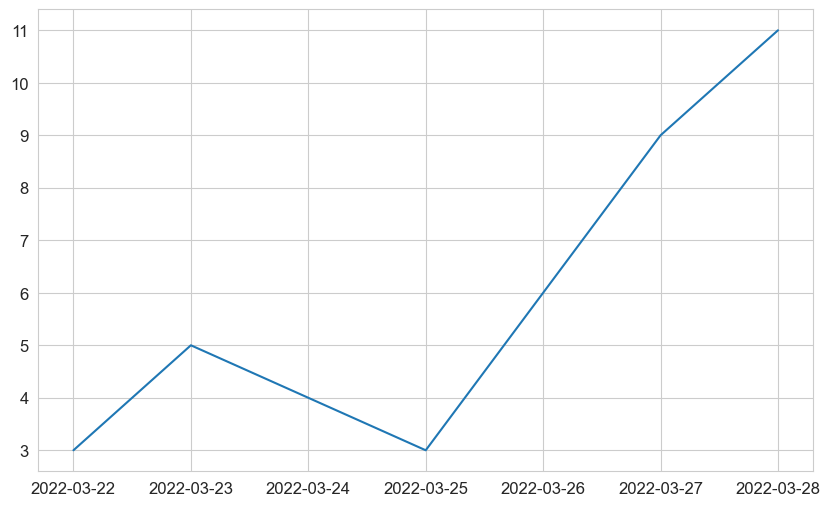

In [24]:
plt.figure(figsize=(10,6))

plt.plot(df.date,
            df.index_value)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

It is difficult to cover every little thing regarding time and date data types, but you now, hopefully, know enough to be able to figure out any time and date data issue that could arise.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)